In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

x_train /= 255
x_test /= 255

n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)


model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='mean_squared_error', 
       optimizer=optimizers.SGD(learning_rate=0.01),
       metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(x_test, y_test))

Epoch 1/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0939 - accuracy: 0.0964 - val_loss: 0.0931 - val_accuracy: 0.1032
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0927 - accuracy: 0.1104 - val_loss: 0.0922 - val_accuracy: 0.1322
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0918 - accuracy: 0.1548 - val_loss: 0.0914 - val_accuracy: 0.1741
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0912 - accuracy: 0.1857 - val_loss: 0.0908 - val_accuracy: 0.1992
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0906 - accuracy: 0.2043 - val_loss: 0.0903 - val_accuracy: 0.2183
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.2182 - val_loss: 0.0898 - val_accuracy: 0.2297
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0897 - accuracy: 0.2321 - val_loss: 0.0894 - val_accuracy: 0.2453

In [27]:
x_pr = model.predict(x_test[0:10000])

min=1
minIndex=100001

for i in range(10000):
  if np.argmax(y_test[i])==np.argmax(x_pr[i]):
    if x_pr[i][np.argmax(x_pr[i])] < min:
      min = x_pr[i][np.argmax(x_pr[i])]
      minIndex = i

x_pr[minIndex]

array([0.02086385, 0.16601351, 0.14879176, 0.08142471, 0.04775493,
       0.16259222, 0.16622113, 0.00621038, 0.1612444 , 0.03888305],
      dtype=float32)

[[0.01355702 0.0755489  0.08186245 0.17729944 0.08284105 0.174035
  0.15758565 0.05307041 0.0995988  0.0846013 ]
 [0.13181399 0.04609098 0.09273227 0.02002037 0.14357992 0.17953141
  0.12944075 0.08302309 0.09217261 0.08159465]
 [0.02086385 0.16601351 0.14879176 0.08142471 0.04775493 0.16259222
  0.16622113 0.00621038 0.1612444  0.03888305]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
第528張圖片判斷為 3 ，數值為 0.17729943990707397 
第9702張圖片判斷為 5 ，數值為 0.17953141033649445 
第1209張圖片判斷為 6 ，數值為 0.16622112691402435 


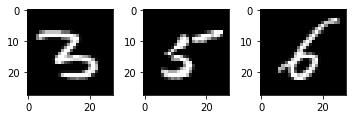

In [28]:
x_pr = model.predict(x_test[0:10000])

min = [1,1,1]
minIndex = [100001,100001,100001]

for i in range(10000):
  if np.argmax(y_test[i])==np.argmax(x_pr[i]):
    if x_pr[i][np.argmax(x_pr[i])] < max(min):
      
      value = max(min)
      index = min.index(value)

      min[index] = x_pr[i][np.argmax(x_pr[i])]
      minIndex[index] = i


print(x_pr[minIndex])
print(y_test[minIndex])

plt.figure(figsize=(5,5))

for ind in range(3):
  textInd=minIndex[ind]
  print("第{}張圖片判斷為 {} ，數值為 {} ".format(textInd,np.argmax(x_pr[textInd]),max(x_pr[textInd])))

  plt.subplot(1, 3 ,ind+1)
  plt.imshow(x_test[minIndex[ind]].reshape((28,28)), cmap='gray')
plt.tight_layout()
plt.show()